# SVM(Support Vector Machine)

* 머신러닝
  1. 지도학습
     - 분류모델 - KNN(최근접이웃), SVM
     - 예측모델
  1. 비지도학습
     - 군집모델 - K-Means, PCA, DBSCAN, 병합군집
     
* SVM은 분류문제에 사용할 수 있는 강력한 머신러닝 지도학습 모델이다.
* `SVM은 결정경계(Decision Boundary)` 즉, 분류를 위한 기준선을 정의하는 모델
* 새로운 데이터가 입력되었을 때 결정경계기준으로 어디 부분에 속하지를 분류하는 모델

<img src="./images/31.머신러닝_지도학습_3_SVM_02.png" width="500" height="400">
<img src="./images/31.머신러닝_지도학습_3_SVM_03.png" width="500" height="400">

##### 개요
1. 기계학습의 분야중 하나로 패턴인식, 자료분석을 위한 지도학습 모델
1. 주로 분류와 회귀분석을 위해 사용

##### 장점
1. 선형분류 및 비선형분류도 가능
1. 모델만들 때 고려해야할 옵션(파라미터)들이 많지 않음
1. 소량의 데이터로도 모델을 만들 수가 있다.
1. 딥러닝 이전까지 분류모델중 가장 성능이 좋았던 모델

##### 적용분야
1. 문서분류
1. 안면인식, 주차번호인식
1. 주가예측
1. 부도예측
1. 고객구매예측
1. 채권등급평가예측

##### 커널 서포트 벡터 머신
* `커널 서포트 벡터머신(보통 SVM이라 함)`은 입력 데이터에서 `초평면 hyperplane`으로 정의되는 복잡한 모델을 만들 수 있도록 확장한 것이다.


In [1]:
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'D2Coding'
plt.rcParams['axes.unicode_minus'] = False

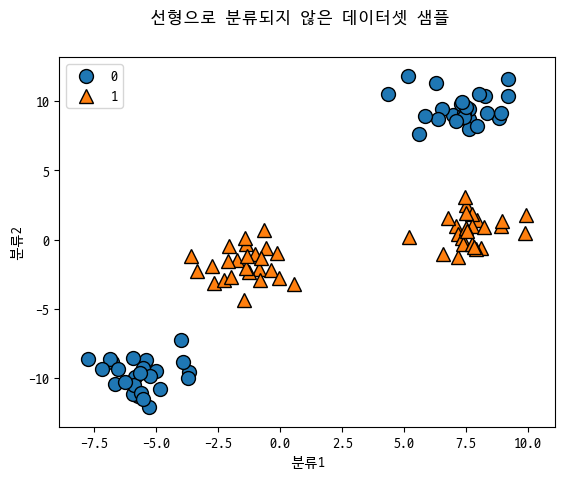

In [34]:
# 선형으로 구분되지 않는 이진분류 데이터셋
from sklearn.datasets import make_blobs
import mglearn

X, y = make_blobs(n_samples=100, centers=4, random_state=8)
y = y % 2 # 분류를 0과 1로 설정

mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.xlabel("분류1")
plt.ylabel("분류2")
plt.suptitle('선형으로 분류되지 않은 데이터셋 샘플')
plt.legend()
plt.show()

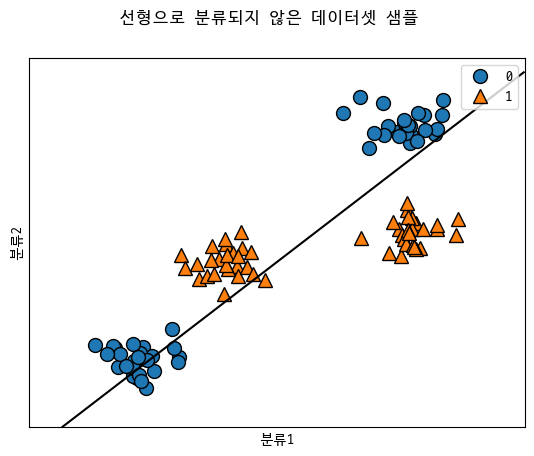

In [35]:
from sklearn.svm import LinearSVC
linear_svm = LinearSVC().fit(X, y)

mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.xlabel("분류1")
plt.ylabel("분류2")
plt.suptitle('선형으로 분류되지 않은 데이터셋 샘플')
plt.legend()

mglearn.plots.plot_2d_separator(linear_svm, X)

plt.show()

# 결과분석
# 선형분류 모델인 LinearSVM알고리즘으로는 분류가 되지 않는다.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


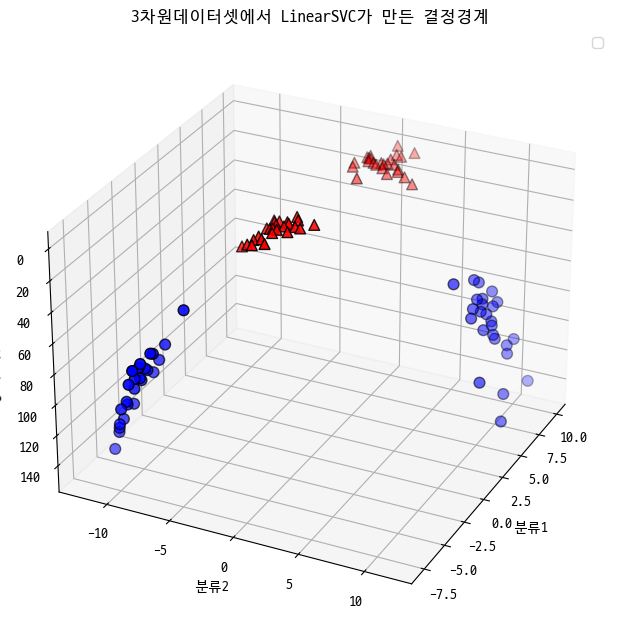

In [54]:
# 커널펑션적용 - 2번째 특성에 제곱을 한 데이터(특성1**2)를 추가해서
# 특성1,2,특성1**2의 3차원데이터로 차원을 확장한 후에 산점도로 표현
from mpl_toolkits.mplot3d import Axes3D, axes3d
import matplotlib

figure = plt.figure(figsize=[10,6])

# 새로운 데이터(특성1**2)를 추가
X_new = np.hstack([X, X[:,1:]**2])

# 3차원그래프
# ax = Axes3D(figure, elev=-152, azim=-26)

ax = Axes3D(figure, elev=-152, azim=-26, auto_add_to_figure=False)
figure.add_axes(ax)

mask = y == 0
# y==0인 데이터, y==1인 데이터를 순차적으로 그래프를 그리기
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b'
           , cmap=mglearn.cm2, s=60, edgecolor='k')

ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r'
           , marker='^', cmap=mglearn.cm2, s=60, edgecolor='k')


plt.xlabel("분류1")
plt.ylabel("분류2")
plt.zlabel("분류1**2")
plt.suptitle('3차원데이터셋에서 LinearSVC가 만든 그래프')
plt.legend()

plt.show()

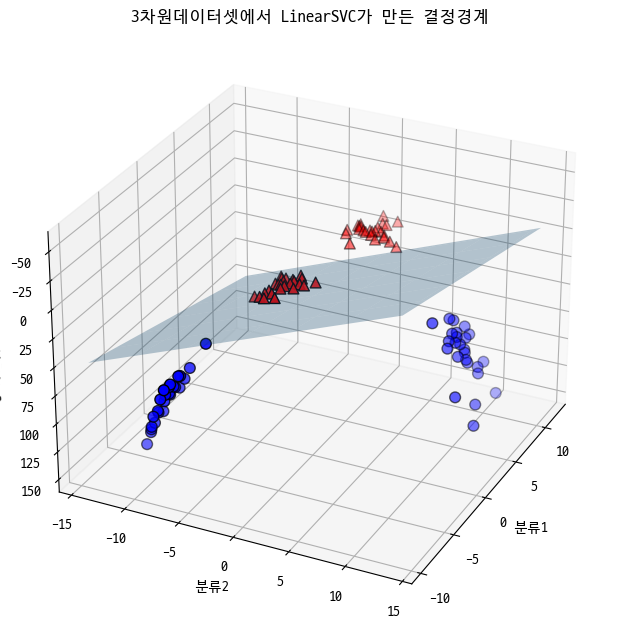

In [78]:
# 커널펑션적용 - 2번째 특성에 제곱을 한 데이터(특성1**2)를 추가해서
# 특성1,2,특성1**2의 3차원데이터로 차원을 확장한 후에 산점도로 표현
linear_svm_3d = LinearSVC(max_iter=5000).fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_

figure = plt.figure(figsize=[10,6])
ax = Axes3D(figure, elev=-152, azim=-26, auto_add_to_figure=False)
figure.add_axes(ax)

# y==0인 데이터, y==1인 데이터를 순차적으로 그래프를 그리기
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b'
           , cmap=mglearn.cm2, s=60, edgecolor='k')

ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r'
           , marker='^', cmap=mglearn.cm2, s=60, edgecolor='k')

xx = np.linspace(X_new[:,0].min() - 2, X_new[:,0].max() + 2, 50)
yy = np.linspace(X_new[:,1].min() - 2, X_new[:,1].max() + 2, 50)

XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2] # 변형된 데이터를 원상복귀
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)

ax.set_xlabel("분류1")
ax.set_ylabel("분류2")
ax.set_zlabel("분류1**2")
ax.set_title('3차원데이터셋에서 LinearSVC가 만든 결정경계')

plt.show()

<class 'numpy.ndarray'> (2500,)


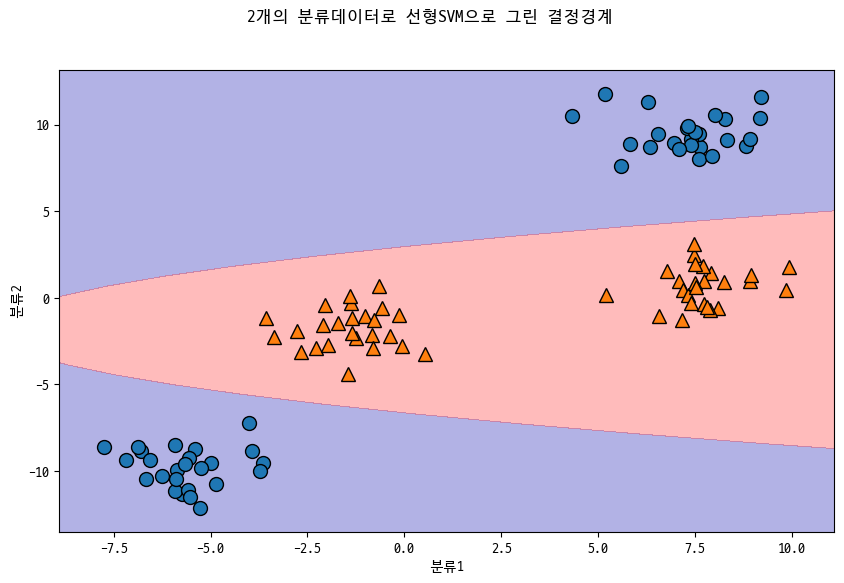

In [83]:
# 데이터셋의 변형으로 LinearSVC에서의 모델은 선형모델이 아니라 비선형모델로 나타났다.
# 비선형으로 평면그래프그리기
figure = plt.figure(figsize=[10,6])
ZZ = YY ** 2

# 3차원에서 1차원(ravel함수)으로 변형 XX, YY, ZZ 붙임(np.c_)
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
print(type(dec), dec.shape) 

mglearn.discrete_scatter(X[:,0], X[:,1], y)


# contourf 윤곽선을 그리는 함수
plt.contourf(XX, YY, dec.reshape(XX.shape), levels=[dec.min(), 0, dec.max()]
            , cmap=mglearn.cm2, alpha=.3)

plt.xlabel("분류1")
plt.ylabel("분류2")
plt.suptitle('2개의 분류데이터로 선형SVM으로 그린 결정경계 ')

plt.show()